## Introduction to Exploratory Data Analysis (EDA)
### Case Study of [Financial Inclusion in Africa](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

In this notebook we dive into some plotting methods commonly used for Exploratory Data Analysis (EDA). 

The goal for EDA are to open-mindedly explore the data, and finding insights to understand the data. 

The purpose of the EDA approach is to:
- maximize insight into a data set
- uncover underlying structure
- extract important variables
- detect outliers and anomalies
- test underlying assumptions
- develop parsimonious models
- determine optimal factor settings

In this notebook we'll investigate the following plotting techniques:

1. Histogram 
1. Scatter Plots
1. Bar Plot
1. Box Plot
1. Summary Statistics

Research Question: How can we predict which individuals are most likely to have or use a bank account?


### Setup - Importing libraries

In [1]:
#dataframe and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
#from lightgbm import LGBMClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

With each notebook, we need to read in our dataset

_Use this if on Google Colab environment_

In [ ]:
from google.colab import files
uploaded = files.upload()

### Read Files

In [2]:
#Load the files into a pandas dataframe
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")
variables = pd.read_csv("data/VariableDefinitions.csv")

### Basic EDA

In [6]:
#View the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
# Preview the first five rows of the train set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# Preview the first five rows of the test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [18]:
# Check the shape (size) of the train and test sets
print('The shape of train dataset is: ',train.shape,'\nThe shape of test set is: ',test.shape)

The shape of train dataset is:  (23524, 13) 
The shape of test set is:  (10086, 12)


In [19]:
#show list of columns
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [20]:
# show some information about the dataset - datatype and size of each column
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables, sizes and data types of each variable. 

This enables us understand the kind of feature engineering we can apply.

In [21]:
# Check for missing values
print('Check for missing values:', train.isnull().sum())

Check for missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our training dataset.

It is worth noting that exploratory data analysis is the whole process about understanding the distribution of data and relationships between different features (variables).

When we move on to use machine learning algorithms, we will be asking a question and trying to answer it using the statistical relationships between different features in the data. The EDA analysis will help us shape this question and have a clear idea about how to approach building the algorithm!

With that in mind, let's look at several visualization methods to examine the data and any relationships between features…

### 1. Histogram

A histogram is useful for looking at the distribution of values for a single variable and also identifying outliers. It shows us the count of data.

The plot below shows the data distribution of age_of_respondent using both bars and a continuous line. Without going into too much detail about the value on the y-axis, what we can take away from this is there is a much higher occurrence of respondents between 20-35 years (high bar/peak in the line) and fewer in 70 to 80 years (low bars/drop in the line).

<AxesSubplot:xlabel='age_of_respondent', ylabel='Count'>

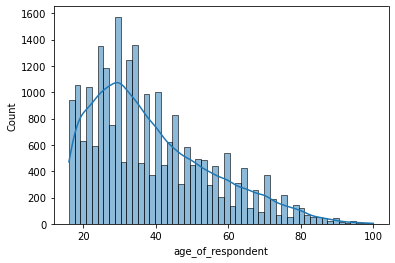

In [18]:
sns.histplot(train['age_of_respondent'], kde=True)

### 2. Scatter plot
The scatter plot is a very popular and powerful way to visualize the relationship between two continuous features. Essentially this plot shows us how feature Y changes when feature X is changed. If there is a clear pattern formed in the scatter plot, we say that x and y are **correlated**. 

There are several outcomes we see on a scatter plot:
- Positive Linear = When X increases, y increases and the data points follow an approximate straight line
- Negative Linear = When X increase, y decreases and the data points follow an approximate straight line
- Non-Linear = When X increases, there is a consistent change in Y but this is not linear. It could be quadratic or exponential for example. 
- No correlation = When X increases, there is no clear pattern to how y changes, The data points form a random distribution.

Let's try this out on our data and choose two continuous variables to plot. We will use `household_size` and `age_of_respondent` continuous variables from our train dataset.

<AxesSubplot:xlabel='household_size', ylabel='age_of_respondent'>

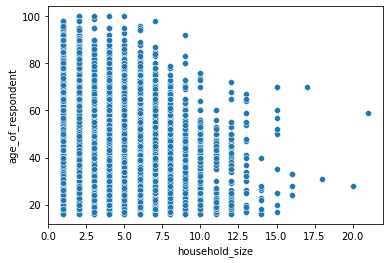

In [23]:
sns.scatterplot(data=train, y="age_of_respondent",x="household_size")

<AxesSubplot:xlabel='household_size', ylabel='age_of_respondent'>

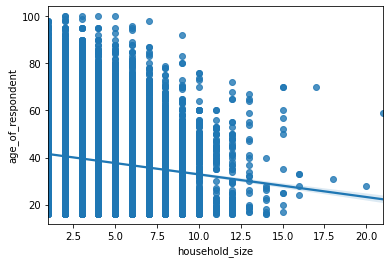

In [24]:
sns.regplot(data=train, y="age_of_respondent",x="household_size")

There is no correlation between the household size and age of respondent

### 3. Bar Plot

Bar plots are useful for understanding how categorical groups are different with respect to a continuous variable.

Let's explore the following categorical features:
* Gender distribution of respondents
* Distribution of the respondents by country and gender
* Location of respondents within a country
* Access to cellphone
* Access to bank account


#### 3.1 Gender distribution of respondents

[Text(0.5, 1.0, 'Age of respondent by gender')]

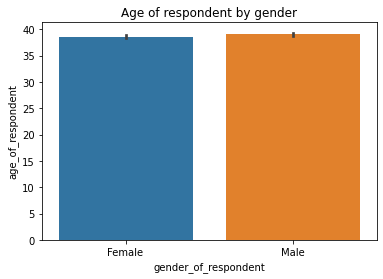

In [29]:
gender = sns.barplot(x="gender_of_respondent", y="age_of_respondent", data=train, estimator=np.mean)
gender.set(title='Age of respondent by gender')

We have more female respondents

#### 3.2 Distribution of the respondents by country and gender

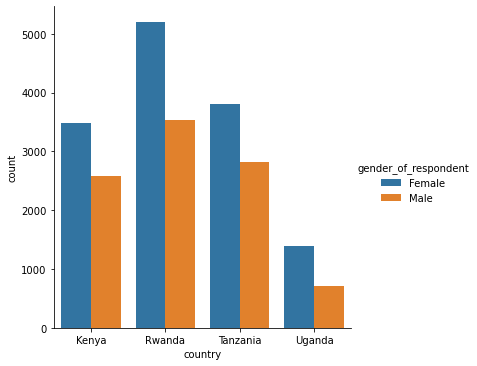

In [6]:
sns.catplot(x="country",kind="count",hue="gender_of_respondent",data=train)

In [14]:
train["country"].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [16]:
train[["country", "gender_of_respondent"]].value_counts(sort=False)

country   gender_of_respondent
Kenya     Female                  3482
          Male                    2586
Rwanda    Female                  5204
          Male                    3531
Tanzania  Female                  3806
          Male                    2814
Uganda    Female                  1385
          Male                     716
dtype: int64

#### 3.3 Location of respondents within a country

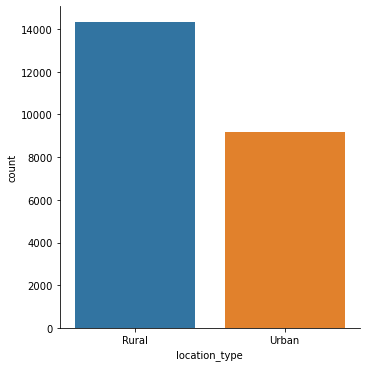

In [18]:
sns.catplot(x="location_type",kind="count",data=train)

We have more respondents living in rural areas than urban

#### 3.4 Access to cellphone

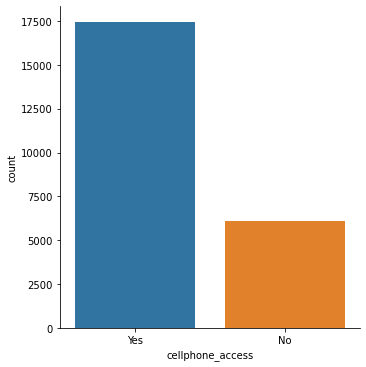

In [19]:
sns.barplot(x="cellphone_access", year kind="count",data=train)

Most respondents have access to cellphone

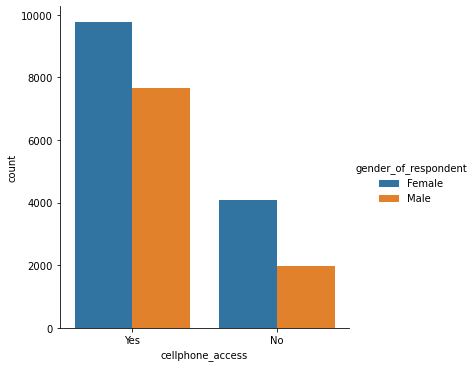

In [21]:
sns.catplot(x="cellphone_access", hue="gender_of_respondent", kind="count",data=train)

#### 3.5 Access to bank account

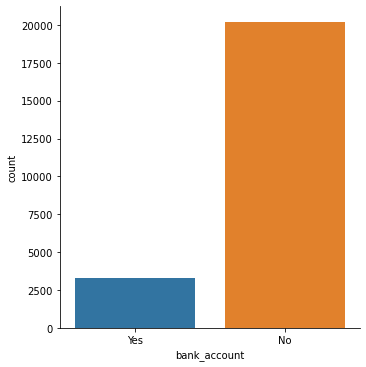

In [22]:
sns.catplot(x="bank_account", kind="count",data=train)

Majority of the respondents don't have access to bank account

In [23]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

### 4. Box Plots

A box plot describes the distribution of data based on five important summary numbers: the minimum, first quartile, median, third quartile, and maximum. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum. 

Lets use this to look at the age of respondents by gender for training and test dataset. 

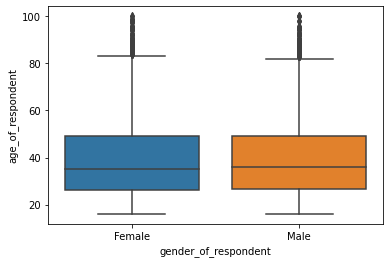

In [35]:
sector = train['gender_of_respondent']
p = sns.boxplot(x=sector, 
                y='age_of_respondent',
                data=train);


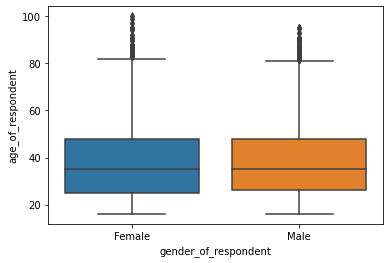

In [36]:
sector = train['gender_of_respondent']
q = sns.boxplot(x=sector, 
                y='age_of_respondent',
                data=test);


### 5. Summary Statistics 

Summary statics include finding the mean, median, frequency, range which are constructive statistics that let you know what is in your data.

In [24]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


What is next
------

Next we move on to feature engineering, where we create variables from what we've found!
Then machine learning modeling